<a href="https://www.kaggle.com/code/mikhail1681/movie-ratings-aggregator-analytics?scriptVersionId=165687435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/be-suspicious-of-online-movie-ratings/other ratings aggregators.csv
/kaggle/input/be-suspicious-of-online-movie-ratings/fandango_ratings aggregator.csv


'''The goal of the project is to adjust the steps based on the Fivethirtyeight.com article in the 
rankings and see if we can come to the same conclusions as in the article. We'll use our pandas and 
data visualization skills to determine whether Fandango provided increased ratings in 2015 in order 
to sell more tickets.'''

# 1. Comparing Fandango ratings and other user ratings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fandago = pd.read_csv("/kaggle/input/be-suspicious-of-online-movie-ratings/fandango_ratings aggregator.csv")

In [4]:
fandago.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandago.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


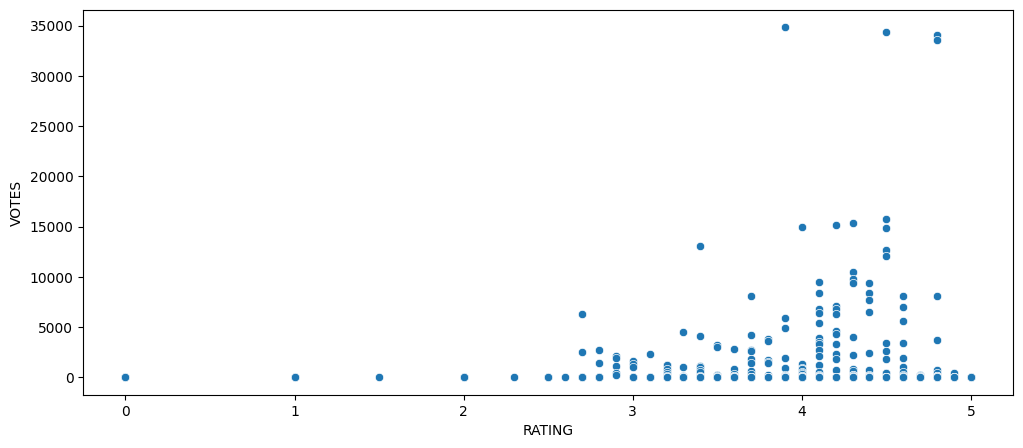

In [7]:
# Let's study the relationship between the popularity of a film and its rating 
# Let's draw a scatterplot showing the relationship between the RATING and VOTES columns
plt.figure(figsize=(12, 5))
sns.scatterplot(data=fandago, x='RATING', y='VOTES');

In [8]:
# let's calculate the correlation between columns
fandago.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
# Each row in the FILM column contains a value in the following format: Movie Title (Year)
# Let's create a new column, take only the year from the FILM line, and call this new column YEAR
fandago['YEAR'] = fandago['FILM'].str[-5:-1]

In [10]:
fandago.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [11]:
# How many movies are in the Fandango dataset, broken down by year?
fandago.groupby('YEAR')['FILM'].count().sort_values(ascending=False)

YEAR
2015    478
2014     23
1964      1
2012      1
2016      1
Name: FILM, dtype: int64

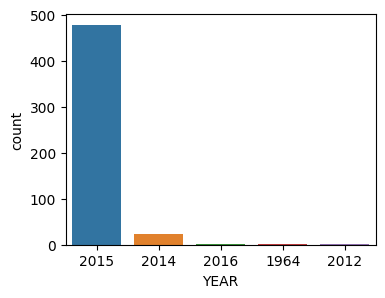

In [12]:
# Visualize the number of films per year using a graph
plt.figure(figsize=(4,3))
sns.countplot(data=fandago, x='YEAR');

In [13]:
# Which 10 films received the most VOTES?
fandago.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [14]:
# How many films have zero VOTES?
fandago[fandago['VOTES'] == 0].shape[0]

69

In [15]:
# Let's create a DataFrame only with those films that have VOTES - that is, 
# we will delete those films that do not have a single VOTES
votes_fandago = fandago[fandago['VOTES'] > 0]

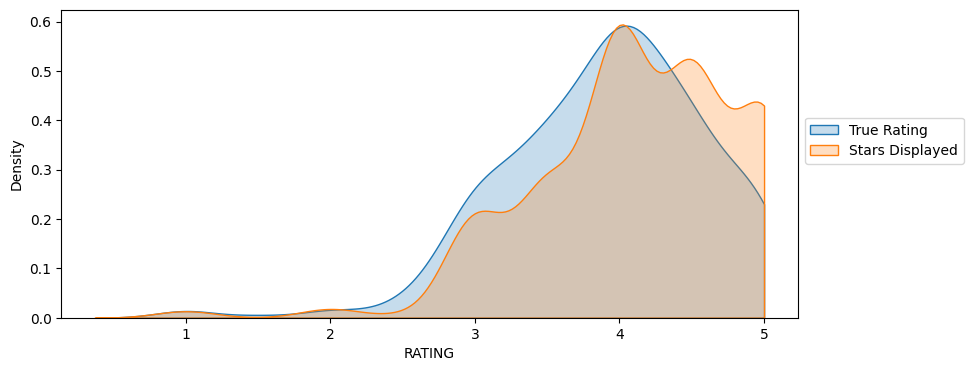

In [16]:
# Let's create a KDE plot that displays the distribution of displayed ratings (STARS) 
# and true ratings based on user votes (RATING). Let's cut the KDE range within 0-5 (according to the number of stars).

plt.figure(figsize=(9.5,4))
sns.kdeplot(data=votes_fandago, x='RATING', clip=(0, 5), fill=True, label='True Rating')
sns.kdeplot(data=votes_fandago, x='STARS', clip=(0, 5), fill=True, label='Stars Displayed')
plt.legend(loc=(1.01, 0.5));

In [17]:
# Now let's calculate this difference numerically; Let's create a new column in which we will store
# the difference between the STARS and RATING columns using the usual STARS-RATING subtraction, 
# and also round to one decimal place.
votes_fandago['STARS_DIFF'] = round(votes_fandago['STARS'] - votes_fandago['RATING'], 1)

/tmp/ipykernel_18/3143345581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_fandago['STARS_DIFF'] = round(votes_fandago['STARS'] - votes_fandago['RATING'], 1)


In [18]:
votes_fandago

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


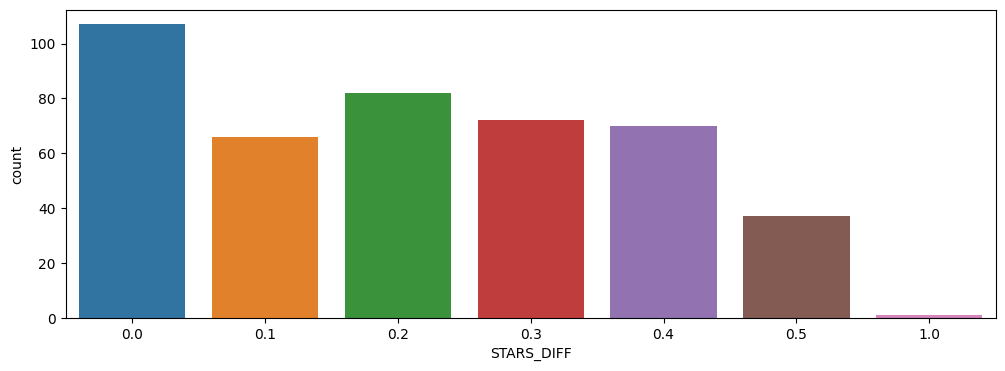

In [19]:
# And let’s draw a count plot to display how many times a particular value of the difference 
# between STAR and RATING occurs.
plt.figure(figsize=(12,4))
sns.countplot(data=votes_fandago, x='STARS_DIFF');

In [20]:
# In this graph we can see that one of the movies has a 1 star difference between the displayed 
# rating and the true rating! Let's find this film.
votes_fandago[votes_fandago['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


#  2. Comparison of Fandango ratings with ratings of other companies.

In [21]:
# load additional data and explore it
other = pd.read_csv("/kaggle/input/be-suspicious-of-online-movie-ratings/other ratings aggregators.csv")

In [22]:
other.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [23]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [24]:
other.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


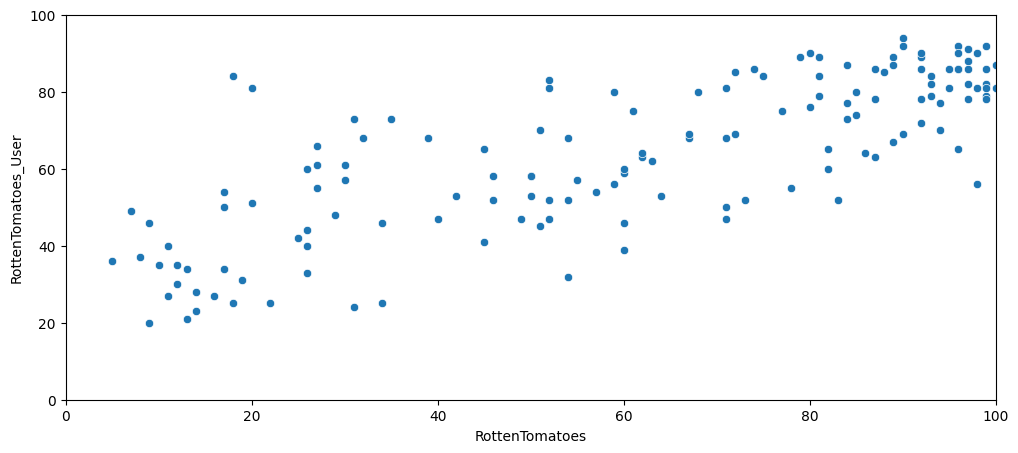

In [25]:
# Let's start with the Rotten Tomatoes ratings. There are two sets of ratings - ratings published by 
# official critics and user ratings.
# Let's draw a scatterplot plotting the relationship between critic ratings and user ratings for Rotten Tomatoes.
plt.figure(figsize=(12,5))
plt.xlim(0, 100)
plt.ylim(0, 100)
sns.scatterplot(data=other, x='RottenTomatoes', y='RottenTomatoes_User');

'''We will calculate the numerical difference between these two ratings using the formula 
RottenTomatoes-RottenTomatoes_User. The resulting Rotten_Diff values are the critic rating minus 
the user rating. Values close to zero indicate that critics and users agree with each other. Large 
positive values - when critics rated the film much higher than users. And large negative values - 
on the contrary, users rated the film much higher than critics.'''

In [26]:
# Let's create a new column in which we save the difference between the critic rating and the user 
# rating for Rotten Tomatoes. We use the formula RottenTomatoes-RottenTomatoes_User.
other['Rotten_Diff'] = other['RottenTomatoes'] - other['RottenTomatoes_User']

'''Now let's calculate the average of the resulting difference over the entire data set. Since 
the difference can be both positive and negative, let's first take the absolute values of all values, 
and only then calculate the average value. This will give us the average of the absolute difference 
between critic ratings and user ratings.'''

In [27]:
# Let's calculate the average absolute difference between critic ratings and user ratings for 
# Rotten Tomatoes, as described above.
abs(other['Rotten_Diff']).mean()

15.095890410958905

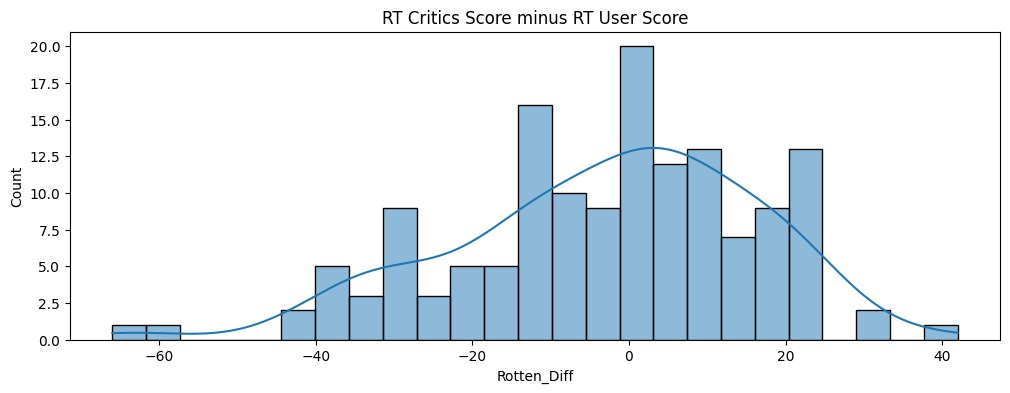

In [28]:
# Let's plot the distribution of the difference between critic ratings and user ratings for 
# Rotten Tomatoes. There will be negative values on this graph. To display this distribution we use 
# both KDE and histograms.
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=other, x='Rotten_Diff', kde=True, bins=25, ax=ax)
ax.set_title('RT Critics Score minus RT User Score');

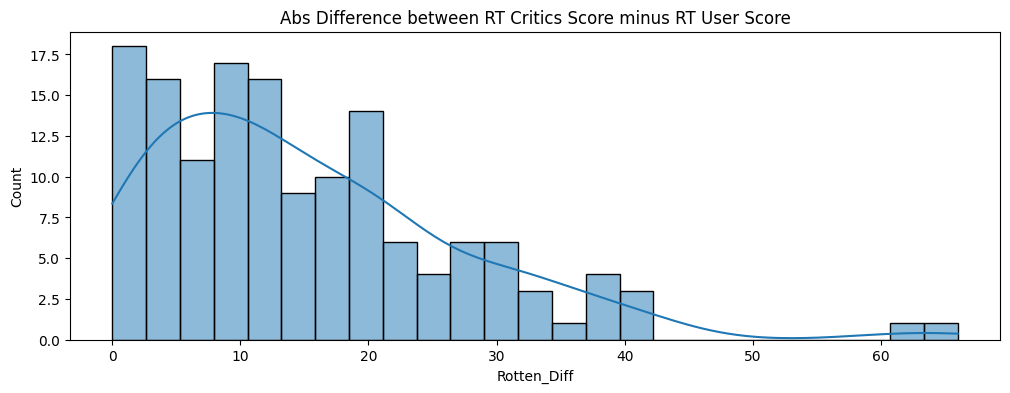

In [29]:
# Next, let's draw a graph of the distribution of absolute values of the difference between ratings from
# critics and user ratings for Rotten Tomatoes.
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=other, x=abs(other['Rotten_Diff']), kde=True, bins=25, ax=ax)
ax.set_title('Abs Difference between RT Critics Score minus RT User Score');

In [30]:
# Let's find out which films differ the most in ratings. First, we will display 5 films with the largest 
# absolute negative difference in ratings. Since we calculated the difference in ratings using the Critics
# Rating - Users Rating formula, large negative values in absolute value indicate that users, on average,
# rated these films much higher than critics.
other[['FILM', 'Rotten_Diff']].sort_values(by='Rotten_Diff', ascending=True).head()

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [31]:
# Then, on the contrary, we will display 5 films that, on average, were rated highest by critics, 
# compared to ratings from users.
other[['FILM', 'Rotten_Diff']].sort_values(by='Rotten_Diff', ascending=False).head()

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


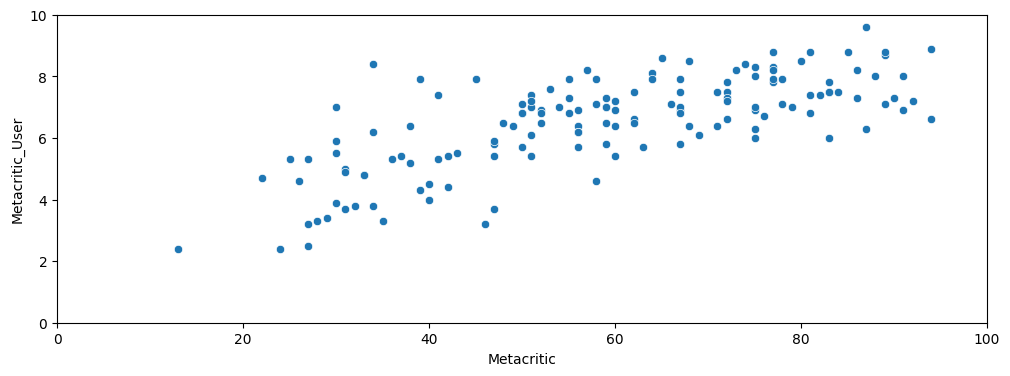

In [32]:
# Next, let's take a quick look at the ratings from MetaCritic. They also display two types of ratings - 
# both their official ratings and user ratings.
# Let's draw a scatterplot graph to compare Metacritic and Metacritic User ratings.
plt.figure(figsize=(12,4))
plt.ylim(0, 10)
plt.xlim(0, 100)
sns.scatterplot(data=other, x='Metacritic', y='Metacritic_User');

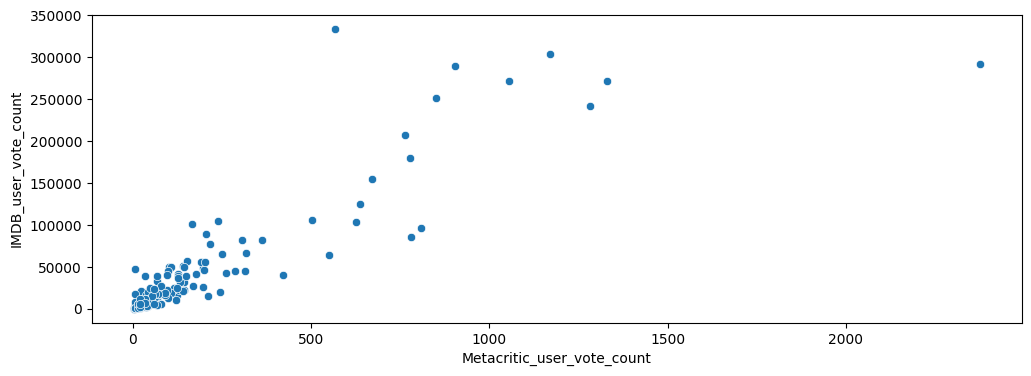

In [33]:
# Finally, let's look at the ratings from IMDB. Please note that Metacritic and IMDB show the number of 
# votes. Let's look at the most popular films.
# Let's draw a scatterplot to depict the relationship between the number of votes on MetaCritic and 
# the number of votes on IMDB.
plt.figure(figsize=(12,4))
sns.scatterplot(data=other, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

In [34]:
# Here we see two “outliers” - points that are very different from all other points. One movie received 
# the most votes on IMDB, but only 500 votes on Metacritic. What kind of movie is this?
other.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [35]:
# Which movie received the most votes on Metacritic?
other.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


Compare Fandango's ratings with those of other companies.
Let's finally find out whether Fandango's ratings were artificially inflated to sell more tickets.

In [36]:
# Let's merge the fandango table with the all_sites table. Not every movie in the Fandango table will be 
# found in the all_sites table, because some Fandango movies have very few reviews or no reviews at all. 
# But we want to compare only those films that are in both tables. Therefore, we will do an “inner merge” 
# of two data sets, matching the rows by the FILM column.
df = pd.merge(fandago, other, how='inner', on='FILM')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [38]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [39]:
# Please note that Rotten Tomatoes, Metacritic and IMDB use a different rating scale than Fandango's 
# 0-5 star scale. To make comparisons, we need to normalize these values so that they fall within 
# the range of 0 to 5 stars.
# Let's add additional columns to all_sites, and write in them the normalized rating values from 0 to 5.
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [40]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [41]:
# Next, we will create a DataFrame called normal, in which we will leave only the normalized ratings.
# We will also leave the STARS and RATING columns from the original fandango table.
normal = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [42]:
normal.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


Comparison of rating distributions from different companies.

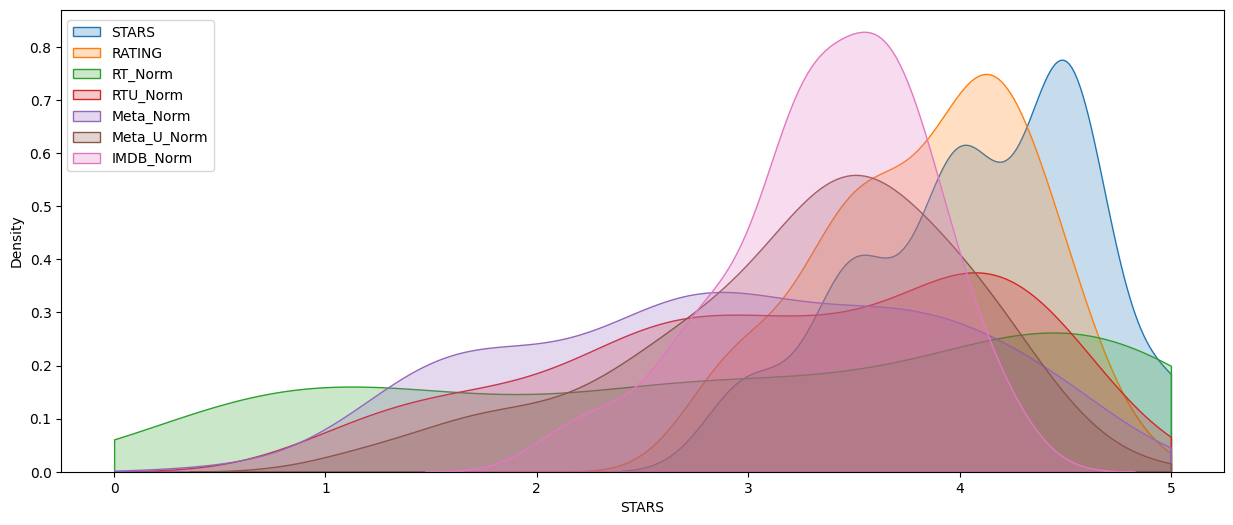

In [43]:
# And now the important moment! Was Fandango really showing unreasonably high ratings? We already know 
# that the RATING values displayed were higher than the STARS values. But are the ratings themselves, 
# on average, higher than those of other companies?
# Let's draw a graph comparing the distributions of normalized ratings from all companies.
plt.figure(figsize=(15,6))
sns.kdeplot(data=normal, x ='STARS', clip=(0, 5), fill=True, label='STARS')
sns.kdeplot(data=normal, x ='RATING', clip=(0, 5), fill=True, label='RATING')
sns.kdeplot(data=normal, x ='RT_Norm', clip=(0, 5), fill=True, label='RT_Norm')
sns.kdeplot(data=normal, x ='RTU_Norm', clip=(0, 5), fill=True, label='RTU_Norm')
sns.kdeplot(data=normal, x ='Meta_Norm', clip=(0, 5), fill=True, label='Meta_Norm')
sns.kdeplot(data=normal, x ='Meta_U_Norm', clip=(0, 5), fill=True, label='Meta_U_Norm')
sns.kdeplot(data=normal, x ='IMDB_Norm', clip=(0, 5), fill=True, label='IMDB_Norm')
plt.legend(loc=(0.005, 0.65));

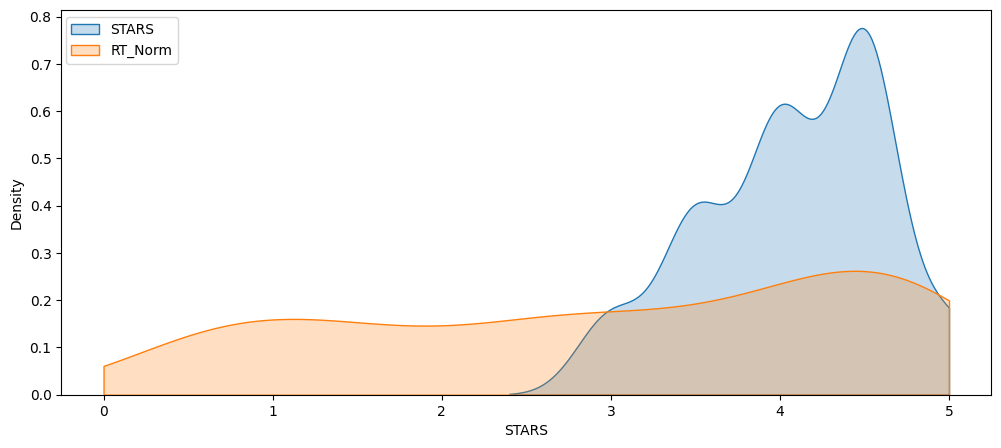

In [44]:
# We immediately see that Fandango's ratings are very skewed to the right. It is also interesting that 
# RT ratings from critics have a very flat distribution. Let's compare just these two distributions.
# Let's draw a KDE plot comparing the distribution of Rotten Tomatoes ratings from critics and 
# the distribution of STARS ratings from Fandango.
plt.figure(figsize=(12,5))
sns.kdeplot(data=normal, x ='STARS', clip=(0, 5), fill=True, label='STARS')
sns.kdeplot(data=normal, x ='RT_Norm', clip=(0, 5), fill=True, label='RT_Norm')
plt.legend(loc=(0.005,  0.86));

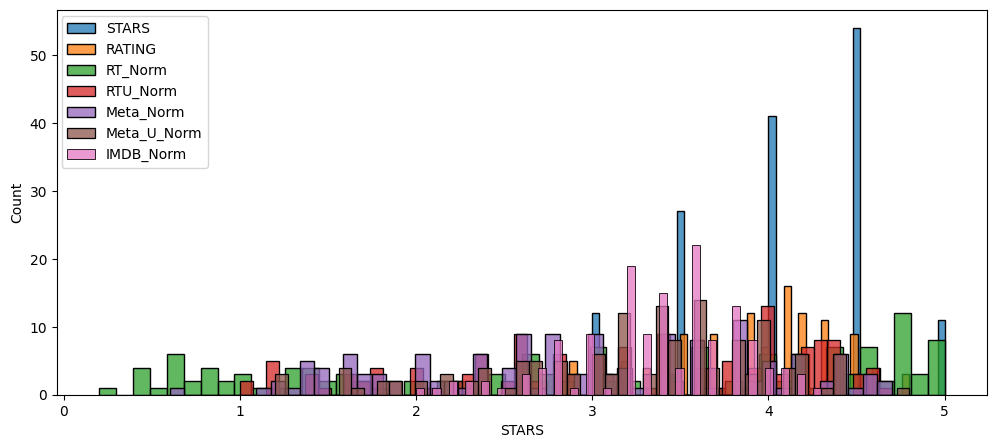

In [45]:
# We will also draw a histplot graph comparing all normalized ratings.
plt.figure(figsize=(12,5))
sns.histplot(data=normal, x ='STARS', label='STARS', bins=50)
sns.histplot(data=normal, x ='RATING', label='RATING', bins=50)
sns.histplot(data=normal, x ='RT_Norm', label='RT_Norm', bins=50)
sns.histplot(data=normal, x ='RTU_Norm', label='RTU_Norm', bins=50)
sns.histplot(data=normal, x ='Meta_Norm', label='Meta_Norm', bins=50)
sns.histplot(data=normal, x ='Meta_U_Norm', label='Meta_U_Norm', bins=50)
sns.histplot(data=normal, x ='IMDB_Norm', label='IMDB_Norm', bins=50)
plt.legend(loc=(0.005,  0.59));

How do different companies rate the lowest rated films?

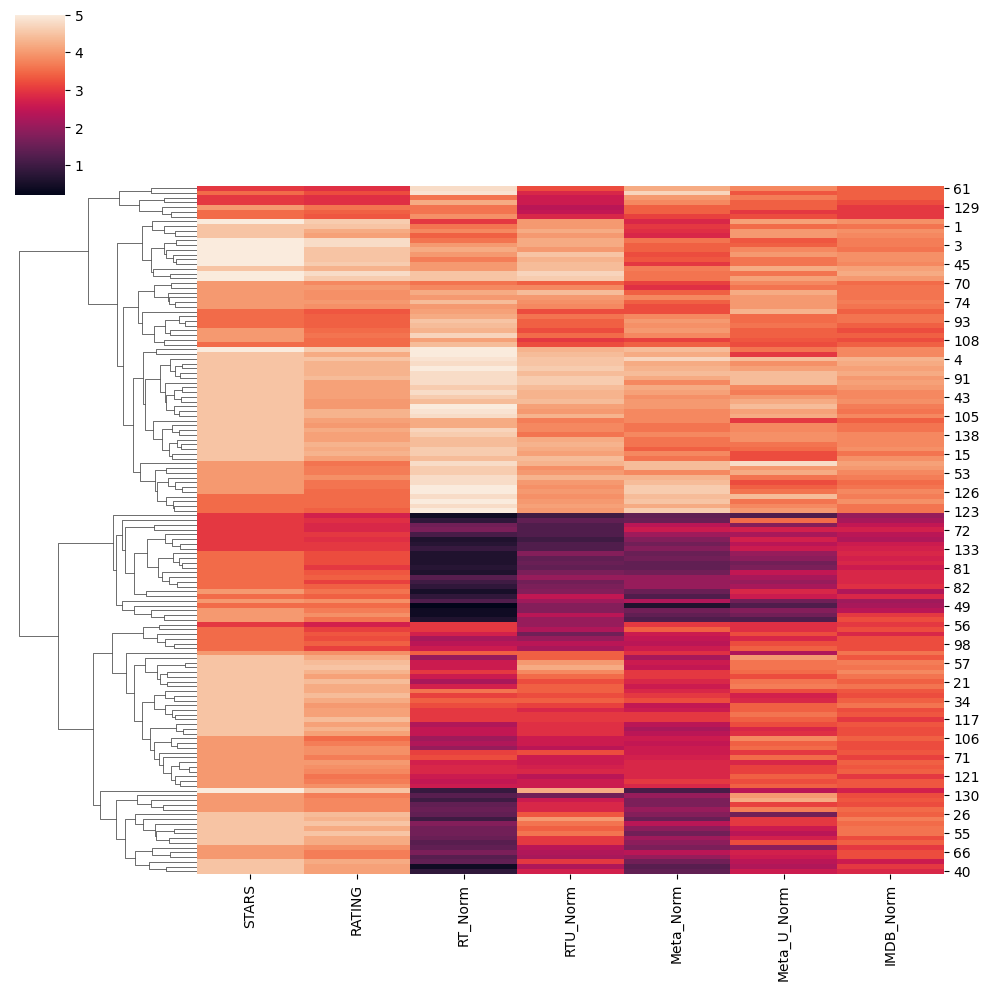

In [46]:
# Let's draw a clustermap graph for all normalized ratings. Please note the differences in ratings between
# different companies. Films with high ratings should fall into some clusters, and films with low ratings 
# into other clusters.
sns.clustermap(data=normal, col_cluster=False);

In [47]:
# We've seen that Fandango's ratings are clearly higher than other companies' ratings, especially when 
# looking at the rounded-up ratings. Let's take a look at the 10 worst-rated films according 
# to Rotten Tomatoes Critic - which 10 films are they? What normalized ratings have other companies given 
# these films? Let's put the FILM column back.
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [48]:
norm_films.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


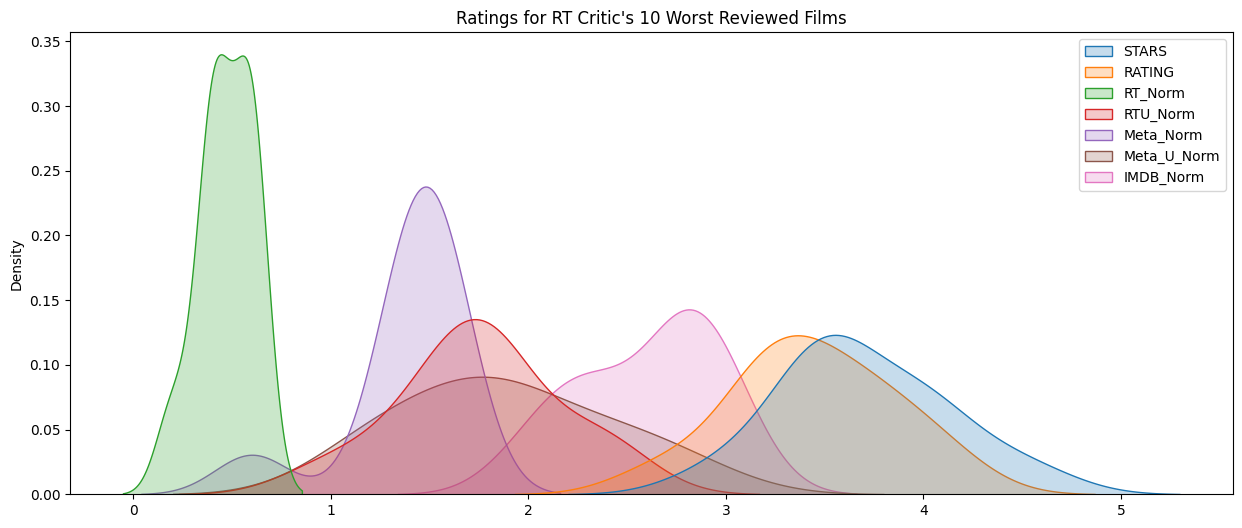

In [49]:
# Let's visualize the distribution of ratings from all companies for the 10 films with the worst ratings.
plt.figure(figsize=(15,6))
sns.kdeplot(data=norm_films.nsmallest(10, 'RT_Norm'), fill=True)
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

In [50]:
# Conclusion: Fandango showed 3-4 stars for films that were clearly failures! The movie that's most 
# different is Taken 3! - Fandango gave it a 4.5 star rating, although this movie received an average 
# rating of 1.86 from other companies!

In [51]:
norm_films.iloc[25]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object

In [52]:
0.4+2.3+1.3+2.3+3

9.3

In [53]:
9.3/5

1.86

#                   **If you are looking at this code, please upvote it. Thank you!**